In [1]:
from helpers import *
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# set globals for all simulations to keep them comparable
NUM_SIM = 500
NUM_CUST = 500
SERVICE_TIME = 2

p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
intervalCustomers = SERVICE_TIME/p

In [3]:
#2.2
simulator1 = queuSim(capacity=1, numSim=5)
simulator2 = queuSim(capacity=2, numSim=5)
simulator4 = queuSim(capacity=4, numSim=5)

In [4]:
waitTimes1 = simulator1.runSim()
waitTimes2 = simulator2.runSim()
waitTimes4 = simulator4.runSim()

In [5]:
# we can reject the null hypothesis
st.f_oneway(waitTimes1, waitTimes2, waitTimes4)

/home/nilss98/.local/lib/python3.8/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


F_onewayResult(statistic=array([       nan, 1.88188122, 3.85831244, 1.80354548, 6.26044523,
       3.21496571, 6.00545643, 3.29870008, 6.48649074, 7.8227033 ,
       5.26421513, 4.30923896, 4.76518165, 6.15177526, 3.86922776,
       3.08250338, 3.54811923, 2.65249882, 3.1063457 , 2.521814  ,
       2.63582819, 3.92108353, 5.64330776, 5.07826086, 3.20264633,
       3.79720091, 5.44657427, 4.41608193, 2.42296007, 2.24138737,
       6.94994086, 2.85676325, 1.12213411, 1.53728801, 7.71004959,
       4.87546785, 1.76871573, 1.83993998, 1.61132666, 2.21592223,
       2.29077546, 1.63389614, 2.95839197, 3.15173974, 1.80422841,
       2.11849345, 3.81789087, 2.58190223, 2.81651   , 2.90961757,
       1.18400705, 0.42637389, 0.63053959, 1.71806978, 2.40927364,
       2.12911255, 1.94050332, 1.04845298, 1.24073273, 0.52587448,
       0.49957018, 0.62514837, 0.67036184, 2.29054395, 1.87509307,
       0.88757955, 1.36419594, 1.48038538, 1.64296572, 1.0499342 ,
       0.7057308 , 1.44177018, 1.8936

In [6]:
# post hoc tests prove that there are differences between all populations
print(st.ttest_ind(waitTimes1, waitTimes4))
print(st.ttest_ind(waitTimes1, waitTimes2))
print(st.ttest_ind(waitTimes2, waitTimes4))

Ttest_indResult(statistic=array([        nan,  1.37181676,  2.67540476,  2.14317399,  3.41024265,
        2.0866111 ,  2.675698  ,  1.91172679,  2.69148776,  3.89660254,
        3.14676343,  3.18363024,  3.87108807,  4.60539238,  3.08517494,
        2.27152747,  3.02502936,  2.93043731,  2.61908024,  2.33582785,
        2.48895999,  2.81713292,  3.32812148,  3.47821415,  2.46447938,
        2.76083536,  3.40224065,  2.63335161,  1.84052882,  1.76034515,
        3.08698956,  1.97717977,  1.30410576,  1.41708355,  3.54850452,
        2.81000023,  1.68053399,  1.7927473 ,  1.71759336,  1.93657662,
        1.70486738,  1.35713733,  1.87959457,  1.99123872,  1.54982227,
        1.67319234,  2.63609138,  2.04542216,  2.14811559,  1.99974389,
        1.23614406,  0.83345873,  0.94245555,  1.47857335,  1.7049297 ,
        1.73880073,  1.92606465,  1.47611225,  1.60097854,  0.80088911,
        0.81031186,  0.6812871 ,  0.28167381, -0.96525754, -0.90178442,
        0.93304273,  0.31315938,  0.49

In [7]:
print(np.mean(waitTimes1))
print(len(waitTimes1))
print(np.mean(waitTimes1))
print(np.mean(waitTimes4))


15.412192560141403
5
15.412192560141403
8.876706044534506


In [8]:
sim = queuSim(capacity=1, numSim=5, newCustomers = 10, intervalCustomers = 2, serviceTime = 1)
xx = sim.runSim()
print(xx)

[[0, 0.6180434347998432, 0.03112114292695578, 0.0, 0.0, 1.0109831376864644, 1.7501128172907983, 0.0, 2.014662592724811, 2.9166782964468307], [0, 0.0, 0.0, 0.0, 1.0123814173028416, 0.0, 0.0, 0.3917942839402784, 0.0, 0.6268167285844797], [0, 2.62297113142352, 0.0, 0.4724001167497498, 0.0, 0.0, 0.8437490829589116, 0.0, 0.0, 0.0], [0, 0.19262802985835314, 0.0, 1.0605761546689507, 0.8096347609715924, 0.0, 0.0, 1.2922491798065714, 0.0, 0.397970690310661], [0, 0.0, 0.0, 0.8066450286853648, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [7]:
# 2.2, run multiple simulations for different p
# service time is fixed at 2 
# customer intervals gets scaled for the amount of servers
# p = 2/intervalcustomers
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

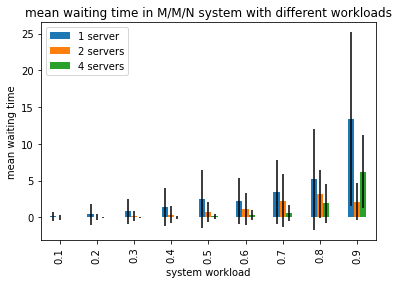

In [8]:
dfAllMar = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllMar.plot.bar(title = "mean waiting time in M/M/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [9]:
# assignment 2.3, use a different service strategy. Shortest job first(SJF).
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, helpStrat = "SJF", intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, helpStrat = "SJF", intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, helpStrat = "SJF", intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

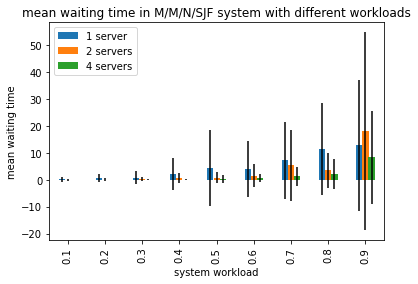

In [10]:
dfAllSJF = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllSJF.plot.bar(title = "mean waiting time in M/M/N/SJF system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [11]:
##2.4
# Deterministic sercive distribution
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "D")
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "D")
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "D")
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

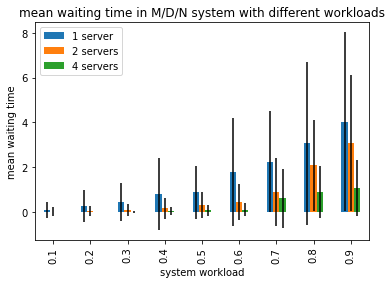

In [12]:
dfAllDet = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllDet.plot.bar(title = "mean waiting time in M/D/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [13]:
##2.4
# Deterministic sercive distribution
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "H")
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "H")
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "H")
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

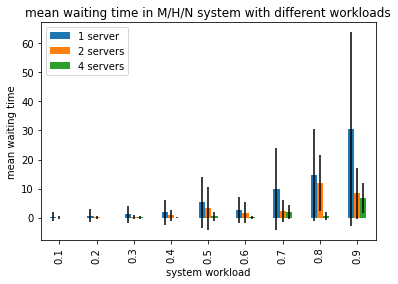

In [14]:
dfAllHyp = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllHyp.plot.bar(title = "mean waiting time in M/H/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)